<a href="https://colab.research.google.com/github/aanandunnis/TV-shows-on-Netflix-Prime-Video-Hulu-and-Disney-A-Data-Analysis/blob/main/project_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TV shows on Netflix, Prime Video, Hulu and Disney+ : A Data Analysis**
## **Content**

The data scraped comprises a comprehensive list of tv shows available on various streaming platforms

## **Aim**
To find the best streaming platform from Netflix, Prime Video, Hulu and Disney+

## **Inspiration**

1) Which streaming platform(s) can I find this tv show on?

2) IMDb ratings of a tv show?

3) Target age group tv shows vs the streaming application they can be found on

4) The year during which a tv show was produced and the streaming 
platform they can be found on

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney'
od.download(dataset_url)

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project eda/tv_shows.csv')
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


# Understaing the data.

In [ ]:
df.shape

(5611, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [ ]:
df['type'].value_counts()

1    5611
Name: type, dtype: int64

## **Observation**
1)Data missing in the IMDb, Age and Rotten Tomatoes

2)The data only contain single type of data, TV Shows 

# Filling the Missing Data

In [ ]:
df['Age'].value_counts()

16+    1018
7+      848
18+     750
all     545
13+       4
Name: Age, dtype: int64

Most of the TV Shows are 16+. So assuming the missing values is the same

In [ ]:
df['Age'].fillna(value = '16+', inplace = True)


In [ ]:
df['IMDb'].describe().to_frame()

,IMDb
count,4450.000000
mean,7.113258
std,1.132060
min,1.000000
25%,6.600000
50%,7.300000
75%,7.900000
max,9.600000


50th percentile of IMDb is 7.3 , filling rest with the same

In [ ]:
df['IMDb'].fillna(value = 7.3,inplace = True)


1)Large number of Null Value in **'Rotten Tomatoes'**. Hence droping the column

2)There is only one type of data,TV shows. Hence droping the type column

In [ ]:
df.drop('Rotten Tomatoes', axis = 1,inplace=True)


In [ ]:
df.drop('type',axis = 1, inplace = True)

# Overview of the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   5611 non-null   int64  
 1   Title        5611 non-null   object 
 2   Year         5611 non-null   int64  
 3   Age          5611 non-null   object 
 4   IMDb         5611 non-null   float64
 5   Netflix      5611 non-null   int64  
 6   Hulu         5611 non-null   int64  
 7   Prime Video  5611 non-null   int64  
 8   Disney+      5611 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 394.6+ KB


In [ ]:
df.describe()

,Unnamed: 0,Year,IMDb,Netflix,Hulu,Prime Video,Disney+
count,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000
mean,2805.000000,2011.021030,7.151898,0.344145,0.312600,0.382107,0.032080
std,1619.900511,11.005116,1.010971,0.475131,0.463594,0.485946,0.176228
min,0.000000,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1402.500000,2010.000000,6.800000,0.000000,0.000000,0.000000,0.000000
50%,2805.000000,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000
75%,4207.500000,2017.000000,7.700000,1.000000,1.000000,1.000000,0.000000
max,5610.000000,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000


**Observations**

1) This dataset contain TV shows from 1901 to 2020

2) Highest IMDb rated TV show is 9.6 and 1.0 as the lowest

3) 38.21% TV Shows are in Prime Videos 


# **Analytical Approach : A Detailed data analysis**

In [ ]:
import matplotlib

sns.set_style('dark')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


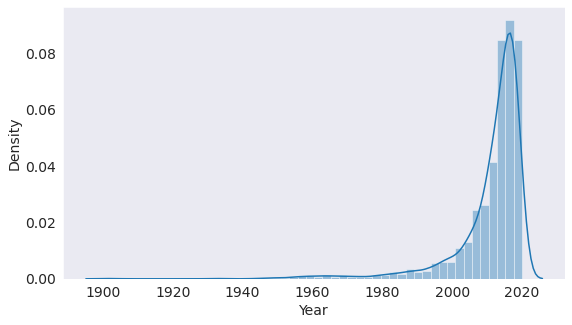

In [ ]:
sns.distplot(df['Year'])

**Observation**

By the beginning of the 21th century there is a trendomous


In [ ]:
top_imdb_rated = df[['Title','IMDb']]
top_imdb_rated = top_imdb_rated.sort_values(by = 'IMDb',ascending=False)[:10]
top_imdb_rated

,Title,IMDb
3023,Destiny,9.6
0,Breaking Bad,9.5
3177,Hungry Henry,9.5
3747,Malgudi Days,9.5
3567,Band of Brothers,9.4
2365,The Joy of Painting,9.4
4128,Green Paradise,9.3
91,Our Planet,9.3
3566,The Wire,9.3
325,Ramayan,9.3


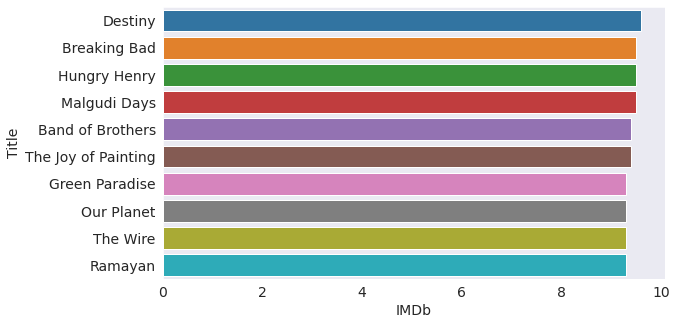

In [ ]:
sns.barplot(x='IMDb', y = 'Title',data = top_imdb_rated)

In [ ]:
xtop_imdb_rated = df[['Title','IMDb']]
xtop_imdb_rated = xtop_imdb_rated.sort_values(by = 'IMDb', ascending = True)[:10]
xtop_imdb_rated

,Title,IMDb
1807,Be With You,1.0
2999,A Little Late with Lilly Singh,1.7
3104,Toddlers & Tiaras,1.8
3144,My Super Sweet 16,1.8
1818,Game Winning Hit,1.8
3145,The Proposal,1.8
3060,The High Fructose Adventures of Annoying Orange,2.0
3292,"Underworld, Inc.",2.1
4551,Strange Love,2.3
1498,The Goop Lab,2.3


**Observation**

1) *Destiny* is the top IMDb rated TV Show with 9.6 rating

2) *Be with you* is the lowest IMDb rated TV show with 1.0 rating

In [ ]:
age = df['Age'].value_counts()
age

16+    3464
7+      848
18+     750
all     545
13+       4
Name: Age, dtype: int64

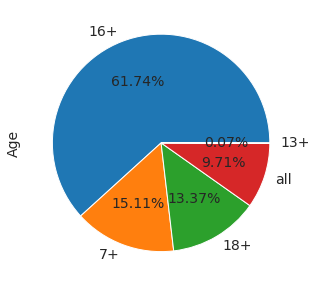

In [ ]:
age.plot.pie(x='Age',autopct='%1.2f%%')

In [ ]:
platforms = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].apply(pd.Series.value_counts).reset_index()
platforms = platforms.T
platforms.drop('index',inplace=True)
platforms

,0,1
Netflix,3680,1931
Hulu,3857,1754
Prime Video,3467,2144
Disney+,5431,180


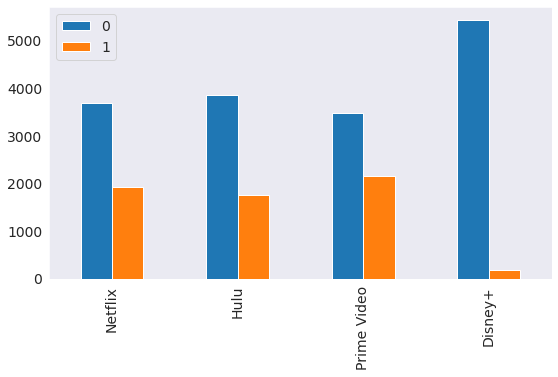

In [ ]:
platforms.plot.bar()

**Observation**

Large of number TV Show are present in Prime Video (as mentioned earlier). To be precise, 2144 TV Shows

In [ ]:
ratingdic = {}
for i in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
  ratingdic['r_'+i] = (df[df[i]==1].IMDb.sum())/(df[df[i]==1][i].sum())


In [ ]:
rating = pd.DataFrame.from_dict(ratingdic,orient='index',columns=['Rating'])
rating 

,Rating
r_Netflix,7.171776
r_Hulu,7.093387
r_Prime Video,7.226726
r_Disney+,6.946667


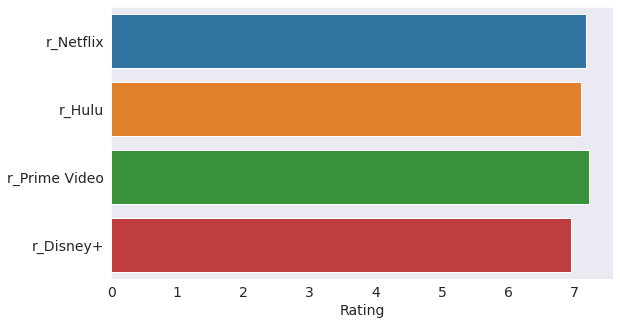

In [ ]:
sns.barplot(x='Rating', y =rating.index, data = rating)

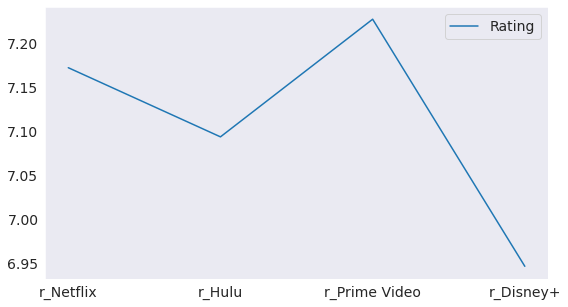

In [ ]:
rating.plot.line()

**Observation**

Most of the TV Shows in Prime Video is highly rated by IMDb. Following the Prime Video we have the Netflix, Hulu and Disney+

In [ ]:
platform_agedict = {}
for i in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
  platform_agedict['a_'+i] = df[df[i]==1].Age.value_counts()
platform_agedict

{'a_Disney+': all    81
 7+     66
 16+    33
 Name: Age, dtype: int64, 'a_Hulu': 16+    991
 7+     365
 18+    239
 all    159
 Name: Age, dtype: int64, 'a_Netflix': 16+    1098
 18+     359
 7+      300
 all     171
 13+       3
 Name: Age, dtype: int64, 'a_Prime Video': 16+    1545
 7+      224
 all     192
 18+     182
 13+       1
 Name: Age, dtype: int64}

In [ ]:
platform_age = pd.DataFrame.from_dict(platform_agedict,orient='index')
platform_age 

,16+,18+,7+,all,13+
a_Netflix,1098,359.0,300,171,3.0
a_Hulu,991,239.0,365,159,NaN
a_Prime Video,1545,182.0,224,192,1.0
a_Disney+,33,NaN,66,81,NaN


In [ ]:
platform_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a_Netflix to a_Disney+
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   16+     4 non-null      int64  
 1   18+     3 non-null      float64
 2   7+      4 non-null      int64  
 3   all     4 non-null      int64  
 4   13+     2 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 192.0+ bytes


In [ ]:
platform_age.fillna(0,inplace = True)
platform_age

,16+,18+,7+,all,13+
a_Netflix,1098,359.0,300,171,3.0
a_Hulu,991,239.0,365,159,0.0
a_Prime Video,1545,182.0,224,192,1.0
a_Disney+,33,0.0,66,81,0.0


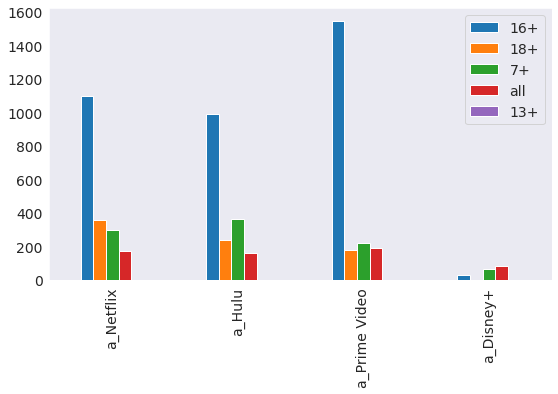

In [ ]:
platform_age.plot.bar()

([<matplotlib.patches.Wedge at 0x7f70208b9f98>,
 [Text(-0.7028044621058956, 0.8462067643572951, '16+'),
  Text(0.090161022325164, -1.0962987686088503, '18+'),
  Text(0.6890744541140518, -0.8574242804396326, '7+'),
  Text(1.0558541928414014, -0.3084994707600535, 'all'),
  Text(1.0999988192934067, -0.001611692623129082, '13+')],
 [Text(-0.38334788842139755, 0.46156732601307005, '72.1%'),
  Text(0.04917873945008945, -0.5979811465139183, '8.5%'),
  Text(0.37585879315311915, -0.46768597114889043, '10.4%'),
  Text(0.5759204688225824, -0.1682724385963928, '9.0%'),
  Text(0.5999993559782217, -0.0008791050671613173, '0.0%')])

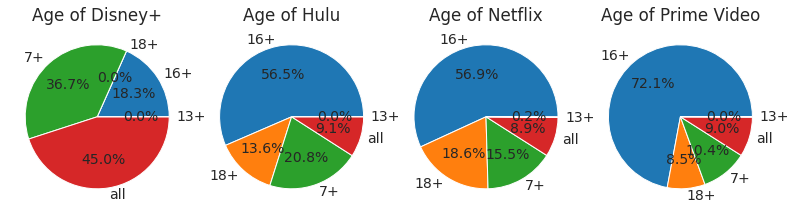

In [ ]:
fig = plt.figure()


ax1 = fig.add_axes([0, 0, 0.5, 0.5], aspect = 1)
ax1.set_title('Age of Disney+')
ax1.pie(platform_aget['a_Disney+'], labels = platform_aget.index,autopct='%1.1f%%')

ax2 = fig.add_axes([0.3, 0, 0.5, 0.5], aspect = 1)
ax2.set_title('Age of Hulu')
ax2.pie(platform_aget['a_Hulu'], labels = platform_aget.index,autopct='%1.1f%%')

ax3 = fig.add_axes([0.6, 0, 0.5, 0.5], aspect = 1)
ax3.set_title('Age of Netflix')
ax3.pie(platform_aget['a_Netflix'], labels = platform_aget.index,autopct='%1.1f%%')

ax4 = fig.add_axes([0.9, 0, 0.5, 0.5], aspect = 1)
ax4.set_title('Age of Prime Video')
ax4.pie(platform_aget['a_Prime Video'], labels = platform_aget.index,autopct='%1.1f%%')

**Observation**

1) Most of the TV Shows of Disney+ is accessible to all age, hence good platform for kids

2) Hulu is a good streaming platform for children above the age of 7

3) While as Netflix and Prime Video are adult contents 

In [ ]:
yearwise = {}
for i in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:  
  yearwise[i+'_year'] = df[df[i] == 1]['Year'].value_counts()

dfyearwise = pd.DataFrame.from_dict(yearwise,orient='index')
dfyearwise = dfyearwise.T

In [ ]:
dfyearwise.fillna(0,inplace = True)
dfyearwise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 2018 to 1904
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Netflix_year      81 non-null     float64
 1   Hulu_year         81 non-null     float64
 2   Prime Video_year  81 non-null     float64
 3   Disney+_year      81 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB


In [ ]:
dfyearwise

,Netflix_year,Hulu_year,Prime Video_year,Disney+_year
2018,272.0,139.0,155.0,13.0
2019,233.0,109.0,36.0,22.0
2017,221.0,132.0,305.0,19.0
2016,219.0,134.0,231.0,10.0
2015,180.0,132.0,161.0,9.0
...,...,...,...,...
1932,0.0,0.0,1.0,0.0
1949,0.0,0.0,1.0,0.0
1945,0.0,0.0,1.0,0.0
1943,0.0,0.0,1.0,0.0


In [ ]:
dfyearwise['Netflix_year'].max()

272.0

In [ ]:
dfyearwise['Hulu_year'].max()

139.0

In [ ]:
dfyearwise['Prime Video_year'].max()

305.0

In [ ]:
dfyearwise['Disney+_year'].max()

22.0

**Observation**

1) In single year large of TV Shows relase in Prime Video. Following the Prime Video there are Netflix.

2) In term of new relase Hulu and Disney+ shows a poor performance.

# **Conclusion**
1) In the given dataset there is data about TV Shows from 1901 to 2020, where we can see a tremendous increase in the number of TV shows by beginning of 21st century

2) Prime Video is the most rated streaming platform, which streams adult contents(16+ to be correct) the more, and some kids contents too.

3) Following Prime Video, Netflix is the 2nd most rated , most of the TV shows in Netflix are also adult contents but few are accessible to everyone

4) Hulu is an average rated streaming platform, which streams kids TV shows

5) Disney+ is a poor rated streaming platform, which streams more contents accessible to everyone.

In short, all the streaming platforms have pros and concs, but most of the public supported TV shows are streamed by Prime Video